1. data analysis （可视化）+ 特征分析 哪些feature可以使用为什么，是否有比较显性的关系，最后是否应用至模型中
2. 模型 （cart + KNN）cart分析哪些方差较大，大概给出原因，再跑出各个feature的importance作为权重放进KNN中进行predict
3. UI界面 记得预留feedback端口以便后续模型优化

### load data

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.decomposition import PCA




In [257]:
df = pd.read_csv("Cleaned_Data_0502.csv")


In [258]:
df

,care_team,age,occupation,intake_no_of_hh,income_assessment_salary,income_assessment_cpf_payout,income_assessment_assistance_from_other_agencies,income_assessment_assistance_from_relatives_friends,income_assessment_insurance_payout,income_assessment_rental_income,...,before_primary,primary_7_12,secondary_13_17,tertiary_18_21,adult_22_64,elderly_65_and_above,income_total_cal,expenditure_total_cal,difference_cal,amount_total
0,central 1 1,13.0,student,3.0,0.0,0.00,500.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,500.00,1601.9,-1101.90,900.00
1,central 1 1,57.0,unemployed,2.0,1500.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1500.00,1084.0,416.00,1144.90
2,central 1 1,32.0,unemployed,4.0,3380.0,0.00,0.0,500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3880.00,3494.0,386.00,243.00
3,central 1 1,69.0,NaN,2.0,525.0,0.00,200.0,400.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1125.00,1114.0,11.00,243.00
4,central 1 1,70.0,NaN,1.0,134.0,0.00,90.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,474.00,700.0,-226.00,200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,south 1 1,55.0,unemployed,4.0,0.0,0.00,1780.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,1780.00,1730.0,50.00,717.20
941,east 1 1,55.0,employed,1.0,0.0,0.00,600.0,150.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,750.00,2285.0,-1535.00,396.80
942,south 2 2,62.0,unemployed,3.0,0.0,0.00,1080.0,0.0,0.0,500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1580.00,1530.0,50.00,126.00
943,east 2 2,66.0,employed,0.0,2800.0,876.95,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,3.0,0.0,3676.95,2416.5,1260.45,1213.15


In [259]:
#df["assessment_date"] = pd.to_datetime(df["assessment_date_time"], errors="coerce").dt.date
#df.drop(columns='assessment_date_time', inplace=True)
df


,care_team,age,occupation,intake_no_of_hh,income_assessment_salary,income_assessment_cpf_payout,income_assessment_assistance_from_other_agencies,income_assessment_assistance_from_relatives_friends,income_assessment_insurance_payout,income_assessment_rental_income,...,before_primary,primary_7_12,secondary_13_17,tertiary_18_21,adult_22_64,elderly_65_and_above,income_total_cal,expenditure_total_cal,difference_cal,amount_total
0,central 1 1,13.0,student,3.0,0.0,0.00,500.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,500.00,1601.9,-1101.90,900.00
1,central 1 1,57.0,unemployed,2.0,1500.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1500.00,1084.0,416.00,1144.90
2,central 1 1,32.0,unemployed,4.0,3380.0,0.00,0.0,500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3880.00,3494.0,386.00,243.00
3,central 1 1,69.0,NaN,2.0,525.0,0.00,200.0,400.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1125.00,1114.0,11.00,243.00
4,central 1 1,70.0,NaN,1.0,134.0,0.00,90.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,474.00,700.0,-226.00,200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,south 1 1,55.0,unemployed,4.0,0.0,0.00,1780.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,1780.00,1730.0,50.00,717.20
941,east 1 1,55.0,employed,1.0,0.0,0.00,600.0,150.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,750.00,2285.0,-1535.00,396.80
942,south 2 2,62.0,unemployed,3.0,0.0,0.00,1080.0,0.0,0.0,500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1580.00,1530.0,50.00,126.00
943,east 2 2,66.0,employed,0.0,2800.0,876.95,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,3.0,0.0,3676.95,2416.5,1260.45,1213.15


In [260]:
df.columns

Index(['care_team', 'age', 'occupation', 'intake_no_of_hh',
       'income_assessment_salary', 'income_assessment_cpf_payout',
       'income_assessment_assistance_from_other_agencies',
       'income_assessment_assistance_from_relatives_friends',
       'income_assessment_insurance_payout', 'income_assessment_rental_income',
       'income_assessment_others_income',
       'expenditure_assessment_mortgage_rental',
       'expenditure_assessmen_utilities', 'expenditure_assessment_s_cc_fees',
       'expenditure_assessment_food_expenses',
       'expenditure_assessment_marketing_groceries',
       'expenditure_assessment_telecommunications',
       'expenditure_assessment_transportation',
       'expenditure_assessmen_medical_expenses',
       'expenditure_assessment_education_expense',
       'expenditure_assessmen_contribution_to_family_members',
       'expenditure_assessment_domestic_helper',
       'expenditure_assessment_loans_debts_installments',
       'expenditure_assessment_in

### feature engineer

In [262]:
# 处理 'intake_no_of_hh', 'no_of_hh', 'before_primary', 'primary_7_12', 'secondary_13_17', 'tertiary_18_21', 'adult_22_64', 'elderly_65_and_above' 列
# 构建新特征，且避免缺失值对模型造成误导

# 新特征：是否提供了家庭结构信息
def is_missing(x):
    return (pd.isnull(x)) | (x == 0)

df["has_no_of_hh"] = (~is_missing(df["no_of_hh"])).astype(int)

# 安全地计算人均收入人数比，避免除 0 或 NaN
df["income_ratio"] = np.where(
    is_missing(df["no_of_hh"]),
    -1,
    df["intake_no_of_hh"] / df["no_of_hh"]
)

# 仍保留标志列
df["income_ratio_missing"] = (df["income_ratio"] == -1).astype(int)
df["income_ratio_filled"] = df["income_ratio"]

# 构造年龄段比例及其填充与缺失标志
age_cols = ['primary_7_12', 'secondary_13_17', 'tertiary_18_21', 'adult_22_64', 'elderly_65_and_above']
for col in age_cols:
    # 年龄段占比（基于总人数）
    df[f"{col}_ratio"] = df[col] / df["no_of_hh"]
    df[f"{col}_ratio_filled"] = df[f"{col}_ratio"].fillna(-1)
    df[f"{col}_ratio_missing"] = df[f"{col}_ratio"].isnull().astype(int)

# 可选：只保留用于建模的列（你可以根据建模需要调整）
feature_cols_1 = [
    "income_ratio_filled", "income_ratio_missing",
    "primary_7_12_ratio_filled", "primary_7_12_ratio_missing",
    "secondary_13_17_ratio_filled", "secondary_13_17_ratio_missing",
    "tertiary_18_21_ratio_filled", "tertiary_18_21_ratio_missing",
    "adult_22_64_ratio_filled", "adult_22_64_ratio_missing",
    "elderly_65_and_above_ratio_filled", "elderly_65_and_above_ratio_missing",
    "has_no_of_hh"
]


# 输出特征构建后的结果
# import ace_tools as tools; tools.display_dataframe_to_user(name="Constructed Features", dataframe=df_model)


In [263]:
# 处理 age

# 合理年龄范围设定
min_age = 6
max_age = 99

# 先过滤掉异常年龄的行（视为无效样本）
df = df[(df["age"] >= min_age) & (df["age"] <= max_age)]

feature_cols_2 = ['age']



In [264]:
# 处理 occupation
print(df["occupation"].value_counts(dropna=False))

# 填补缺失为 "missing"
df["occupation_filled"] = df["occupation"].fillna("missing")

# Label Encoding（适用于 tree 模型）
#le = LabelEncoder()
#df["occupation_encoded"] = le.fit_transform(df["occupation_filled"])

# 可查看编码映射
#occupation_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#print("Occupation encoding mapping:", occupation_mapping)

# 缺失标志（是否原始是 NaN）
df["occupation_missing"] = df["occupation"].isnull().astype(int)

#feature_cols_3 = ['occupation_encoded', 'occupation_missing']


## 如果模型是KNN的话，这里需要改成one-hot编码
# One-Hot 编码
df_onehot = pd.get_dummies(df["occupation_filled"], prefix="occ")

# 合并回主表
df = pd.concat([df, df_onehot], axis=1)

# 指定最终用于模型的特征列
# 这里选 occupation_missing + 所有 one-hot 列
feature_cols_3 = ["occupation_missing"] + list(df_onehot.columns)


occupation
unemployed    522
employed      169
retired       137
NaN            74
student        22
part-time      16
Name: count, dtype: int64


/var/folders/xl/v2d6_bws3352wtfw95r6pg6r0000gn/T/ipykernel_93036/163158506.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["occupation_filled"] = df["occupation"].fillna("missing")
/var/folders/xl/v2d6_bws3352wtfw95r6pg6r0000gn/T/ipykernel_93036/163158506.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["occupation_missing"] = df["occupation"].isnull().astype(int)


In [265]:
# 处理income 和 expenditure
feature_cols_4 = [
    'income_assessment_salary', 
    'income_assessment_cpf_payout',
    'income_assessment_assistance_from_other_agencies',
    'income_assessment_assistance_from_relatives_friends',
    'income_assessment_insurance_payout', 
    'income_assessment_rental_income',
    'income_assessment_others_income',
    'expenditure_assessment_mortgage_rental',
    'expenditure_assessmen_utilities', 
    'expenditure_assessment_s_cc_fees',
    'expenditure_assessment_food_expenses',
    'expenditure_assessment_marketing_groceries',
    'expenditure_assessment_telecommunications',
    'expenditure_assessment_transportation',
    'expenditure_assessmen_medical_expenses',
    'expenditure_assessment_education_expense',
    'expenditure_assessmen_contribution_to_family_members',
    'expenditure_assessment_domestic_helper',
    'expenditure_assessment_loans_debts_installments',
    'expenditure_assessment_insurance_premiums',
    'expenditure_assessment_others_expenditure',
    'income_total_cal', 
    'expenditure_total_cal',
    'difference_cal']


In [266]:
# 处理 current_saving 列

df.loc[df["current_savings"] < 0, "current_savings"] = 0

feature_cols_5 = ['current_savings']

In [267]:
# 处理 type_of_assistances
print(df['type_of_assistances'].value_counts())

# Label Encoding（适用于 tree 模型）
#le = LabelEncoder()
#df["type_of_assistances_encoded"] = le.fit_transform(df["type_of_assistances"])

# 可查看编码映射
#type_of_assistances_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#print("type_of_assistances encoding mapping:", type_of_assistances_mapping)

#feature_cols_6 = ['type_of_assistances_encoded']

## 如果模型是KNN的话，这里需要改成one-hot编码
# One-Hot 编码
df_onehot = pd.get_dummies(df["type_of_assistances"], prefix="occ")

# 合并回主表
df = pd.concat([df, df_onehot], axis=1)

# 指定最终用于模型的特征列
# 这里选 occupation_missing + 所有 one-hot 列
feature_cols_6 = list(df_onehot.columns)


type_of_assistances
interim_dialysis_assistance        395
medical_consumables_assistance     193
medical_transport_assistance       150
household_living_assistance        110
hiv_medication_fees                 24
others                              23
education_fees_assistance           22
day_care_fees_assistance            14
antenatal_check_fees_assistance      9
Name: count, dtype: int64


In [268]:
feature_cols = feature_cols_1 + feature_cols_2 + feature_cols_3 + feature_cols_4 + feature_cols_5 + feature_cols_6
print(len(features))

43


In [269]:
df

,care_team,age,occupation,intake_no_of_hh,income_assessment_salary,income_assessment_cpf_payout,income_assessment_assistance_from_other_agencies,income_assessment_assistance_from_relatives_friends,income_assessment_insurance_payout,income_assessment_rental_income,...,occ_unemployed,occ_antenatal_check_fees_assistance,occ_day_care_fees_assistance,occ_education_fees_assistance,occ_hiv_medication_fees,occ_household_living_assistance,occ_interim_dialysis_assistance,occ_medical_consumables_assistance,occ_medical_transport_assistance,occ_others
0,central 1 1,13.0,student,3.0,0.0,0.00,500.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
1,central 1 1,57.0,unemployed,2.0,1500.0,0.00,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,False,True,False
2,central 1 1,32.0,unemployed,4.0,3380.0,0.00,0.0,500.0,0.0,0.0,...,True,False,False,False,False,False,False,True,False,False
3,central 1 1,69.0,NaN,2.0,525.0,0.00,200.0,400.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
4,central 1 1,70.0,NaN,1.0,134.0,0.00,90.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,south 1 1,55.0,unemployed,4.0,0.0,0.00,1780.0,0.0,0.0,0.0,...,True,False,False,False,False,False,True,False,False,False
941,east 1 1,55.0,employed,1.0,0.0,0.00,600.0,150.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
942,south 2 2,62.0,unemployed,3.0,0.0,0.00,1080.0,0.0,0.0,500.0,...,True,False,False,False,False,False,False,True,False,False
943,east 2 2,66.0,employed,0.0,2800.0,876.95,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False


In [270]:
# 按时间分组训练模型

# 1. 将 assessment_date_time 转换为 pandas datetime 类型
df["assessment_date"] = pd.to_datetime(df["assessment_date_time"], errors="coerce")

# 2. 删除原始列
df.drop(columns='assessment_date_time', inplace=True)

# 3. 去除无效日期（NaT 或年份为 0）
df = df[df["assessment_date"].notna()]
df = df[df["assessment_date"].dt.year != 0]

# 4. 提取年份列为整数
df["assessment_year"] = df["assessment_date"].dt.year.astype(int)

# 5. 按年份拆分为多个子数据集
yearly_dfs = {
    year: group_df.reset_index(drop=True)
    for year, group_df in df.groupby("assessment_year")
}

# （可选）6. 查看拆分结果
for year, subdf in yearly_dfs.items():
    print(f"Year {year}: {subdf.shape[0]} records")


Year 2002: 1 records
Year 2015: 1 records
Year 2017: 3 records
Year 2018: 1 records
Year 2019: 2 records
Year 2020: 42 records
Year 2021: 71 records
Year 2022: 204 records
Year 2023: 329 records
Year 2024: 259 records
Year 2025: 4 records


In [271]:
df_2022 = yearly_dfs[2022]
df_2023 = yearly_dfs[2023]
df_2024 = yearly_dfs[2024]
df_2025 = yearly_dfs[2025]

In [272]:
df_2022_xy = df_2022[feature_cols + ['amount_total'] + ['care_team']]
df_2023_xy = df_2023[feature_cols + ['amount_total'] + ['care_team']]
df_2024_xy = df_2024[feature_cols + ['amount_total'] + ['care_team']]
df_2025_xy = df_2025[feature_cols + ['amount_total'] + ['care_team']]

df_2022_xy
#df_2023_xy
#df_2024_xy
#df_2025_xy

,income_ratio_filled,income_ratio_missing,primary_7_12_ratio_filled,primary_7_12_ratio_missing,secondary_13_17_ratio_filled,secondary_13_17_ratio_missing,tertiary_18_21_ratio_filled,tertiary_18_21_ratio_missing,adult_22_64_ratio_filled,adult_22_64_ratio_missing,...,occ_day_care_fees_assistance,occ_education_fees_assistance,occ_hiv_medication_fees,occ_household_living_assistance,occ_interim_dialysis_assistance,occ_medical_consumables_assistance,occ_medical_transport_assistance,occ_others,amount_total,care_team
0,-1.0,1,-1.0,1,-1.0,1,-1.0,1,-1.000000,1,...,False,False,False,False,False,False,True,False,1040.00,central 1 1
1,0.2,0,0.0,0,0.0,0,0.0,0,1.000000,0,...,False,False,False,False,False,False,True,False,430.00,central 1 1
2,-1.0,1,-1.0,1,-1.0,1,-1.0,1,-1.000000,1,...,False,False,False,False,False,False,True,False,300.00,central 1 1
3,-1.0,1,-1.0,1,-1.0,1,-1.0,1,-1.000000,1,...,False,False,False,False,True,False,False,False,1473.35,central 1 1
4,-1.0,1,-1.0,1,-1.0,1,-1.0,1,-1.000000,1,...,False,False,False,True,False,False,False,False,350.00,central 1 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1.0,0,0.0,0,0.0,0,0.0,0,0.666667,0,...,False,False,False,False,False,False,False,True,36.00,south 1 1
200,-1.0,1,-1.0,1,-1.0,1,-1.0,1,-1.000000,1,...,False,False,False,False,False,True,False,False,253.65,south 3 3
201,-1.0,1,-1.0,1,-1.0,1,-1.0,1,-1.000000,1,...,False,False,False,False,True,False,False,False,1213.15,east 1 1
202,-1.0,1,-1.0,1,-1.0,1,-1.0,1,-1.000000,1,...,False,False,False,False,True,False,False,False,1213.15,east 1 1


### KNN训练模型
原始数据
   ↓
✔ 消除care_team的主观偏差
   ↓
✔ log1p（对 skewed 金额类特征）
   ↓
✔ 标准化（StandardScaler，统一尺度）
   ↓
✔ XGBoost 进行特征重要性筛选（降噪，减冗余）
   ↓
✔ PCA 降维（压缩特征空间，去相关性）
   ↓
✔ 用 PCA 后的特征进行 KNN 训练

In [273]:
# 消除care_team的主观偏差

# 去偏差标签处理（中心化 reviewer）
team_mean = df_2022_xy.groupby("care_team")["amount_total"].mean()
df_2022_xy["team_mean"] = df_2022_xy["care_team"].map(team_mean)
df_2022_xy["amount_adjusted_label"] = df_2022_xy["amount_total"] - df_2022_xy["team_mean"]


/var/folders/xl/v2d6_bws3352wtfw95r6pg6r0000gn/T/ipykernel_93036/3643955889.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_xy["team_mean"] = df_2022_xy["care_team"].map(team_mean)
/var/folders/xl/v2d6_bws3352wtfw95r6pg6r0000gn/T/ipykernel_93036/3643955889.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_xy["amount_adjusted_label"] = df_2022_xy["amount_total"] - df_2022_xy["team_mean"]


In [274]:
# 对特征做log
# KNN中，如果某些特征数值跨度特别大（例如：存款从 0 到 1,000,000），它们将主导距离计算，让模型忽略其他小尺度特征（如年龄、人数）

df_2022_xy['difference_cal'] = - df_2022_xy['difference_cal']

log_cols = ['income_assessment_salary',
       'income_assessment_cpf_payout',
       'income_assessment_assistance_from_other_agencies',
       'income_assessment_assistance_from_relatives_friends',
       'income_assessment_insurance_payout', 'income_assessment_rental_income',
       'income_assessment_others_income',
       'expenditure_assessment_mortgage_rental',
       'expenditure_assessmen_utilities', 'expenditure_assessment_s_cc_fees',
       'expenditure_assessment_food_expenses',
       'expenditure_assessment_marketing_groceries',
       'expenditure_assessment_telecommunications',
       'expenditure_assessment_transportation',
       'expenditure_assessmen_medical_expenses',
       'expenditure_assessment_education_expense',
       'expenditure_assessmen_contribution_to_family_members',
       'expenditure_assessment_domestic_helper',
       'expenditure_assessment_loans_debts_installments',
       'expenditure_assessment_insurance_premiums',
       'expenditure_assessment_others_expenditure', 'income_total_cal',
       'expenditure_total_cal', 'difference_cal', 'current_savings'
       ]
other_cols = ['income_ratio_filled', 'income_ratio_missing',
       'primary_7_12_ratio_filled', 'primary_7_12_ratio_missing',
       'secondary_13_17_ratio_filled', 'secondary_13_17_ratio_missing',
       'tertiary_18_21_ratio_filled', 'tertiary_18_21_ratio_missing',
       'adult_22_64_ratio_filled', 'adult_22_64_ratio_missing',
       'elderly_65_and_above_ratio_filled',
       'elderly_65_and_above_ratio_missing', 'has_no_of_hh', 'age',
       'occupation_missing', 'occ_employed', 'occ_missing', 'occ_part-time',
       'occ_retired', 'occ_student', 'occ_unemployed', 
       'occ_antenatal_check_fees_assistance', 'occ_day_care_fees_assistance',
       'occ_education_fees_assistance', 'occ_hiv_medication_fees',
       'occ_household_living_assistance', 'occ_interim_dialysis_assistance',
       'occ_medical_consumables_assistance',
       'occ_medical_transport_assistance', 'occ_others']
y_col = ['amount_total']
special_col = ['care_team']

# 对这些列统一进行 log1p 变换
df_2022_xy_log = np.log1p(df_2022_xy[log_cols])

df_2022_xy_log = df_2022_xy_log.fillna(0) #有一些difference_cal是负值，log后变成空值，用0填充

df_2022_xy[["log_" + col for col in log_cols]] = df_2022_xy_log



/var/folders/xl/v2d6_bws3352wtfw95r6pg6r0000gn/T/ipykernel_93036/4173288306.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_xy['difference_cal'] = - df_2022_xy['difference_cal']
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)
/var/folders/xl/v2d6_bws3352wtfw95r6pg6r0000gn/T/ipykernel_93036/4173288306.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_xy[["log_" + c

In [275]:
# 标准化特征并用pca降维

# 构建最终特征列（使用 log 后缀 + 其他）
feature_cols = ["log_" + col for col in log_cols] + other_cols
X = df_2022_xy[feature_cols]
y = df_2022_xy["amount_adjusted_label"]

# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 降维（例如保留95%的方差）
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [280]:
# 训练模型

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)

# 7. KNN 训练
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# 8. 预测的是“偏移值”
predicted_adjusted = knn.predict(X_test)

# 9. 用全体 care_team 平均还原
global_mean = team_mean.mean()
final_pred = predicted_adjusted + global_mean

# 10. 真实值
y_true = df_2022_xy.loc[y_test.index, "amount_total"]

# 11. 打印结果
print("真实值:", y_true.values)
print("预测值:", final_pred.round(2))
print("RMSE:", round(mean_squared_error(y_true, final_pred, squared=False), 2))

真实值: [ 150.    297.   1040.   2200.   1301.55    0.   1965.6   200.   1213.15
  810.    660.    243.    460.   1520.9   182.   1637.8  1300.    135.
 1251.9  1520.9  1549.6     0.    150.    634.6   790.    200.   1950.
  602.3   792.6   303.55    0.    150.   1170.      0.    745.15  126.8
  167.4  3349.06 1170.   1473.35  800.     36.      0.   1505.   1170.
  122.5   800.    725.4   150.   1150.   1170.  ]
预测值: [ 618.53  253.02 1100.47 1111.17 1074.77  955.75 1450.23 1400.97 1333.13
 1698.61  489.6   294.8  1034.32 1173.72  139.31 1024.93  963.57  549.4
 1317.84  919.96 1123.11  991.04 1285.57  575.98  964.81  350.97  379.94
  373.79 1252.45 1272.26  549.4   859.15 1144.95 1301.7  1195.35  272.44
  442.11  727.46 1314.04  844.72  992.78  367.8   452.82 1053.18 1450.23
 1401.75  926.93 1074.7  1509.5   499.22 1808.81]
RMSE: 737.67


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


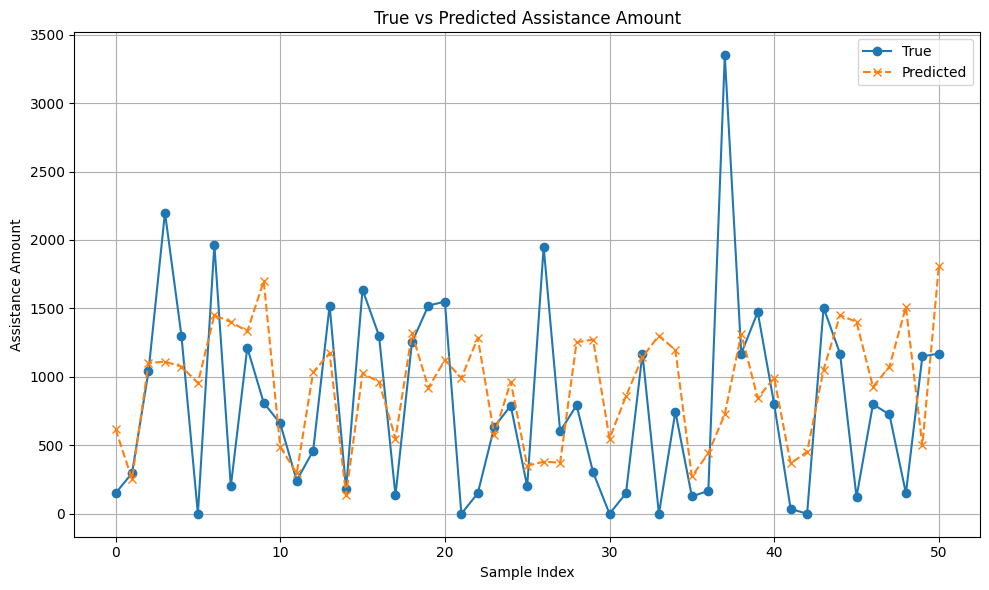

In [281]:
# 确保索引对齐（尤其在 sklearn split 后）
y_true = np.array(y_true)
final_pred = np.array(final_pred)

# 画图：真实值 vs 预测值
plt.figure(figsize=(10, 6))
plt.plot(y_true, label="True", marker='o', linestyle='-')
plt.plot(final_pred, label="Predicted", marker='x', linestyle='--')
plt.title("True vs Predicted Assistance Amount")
plt.xlabel("Sample Index")
plt.ylabel("Assistance Amount")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


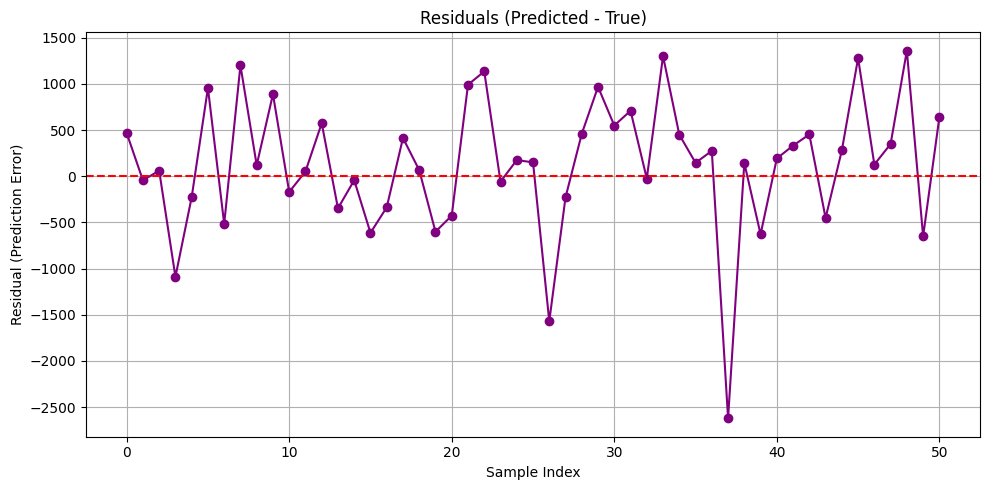

In [282]:
residuals = final_pred - y_true  # 预测值 - 真实值
plt.figure(figsize=(10, 5))
plt.plot(residuals, marker='o', linestyle='-', color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals (Predicted - True)")
plt.xlabel("Sample Index")
plt.ylabel("Residual (Prediction Error)")
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/xl/v2d6_bws3352wtfw95r6pg6r0000gn/T/ipykernel_93036/2952822404.py:1: RuntimeWarning: divide by zero encountered in divide
  residual_ratio = (final_pred - y_true) / y_true  # (预测值 - 真实值)/真实值


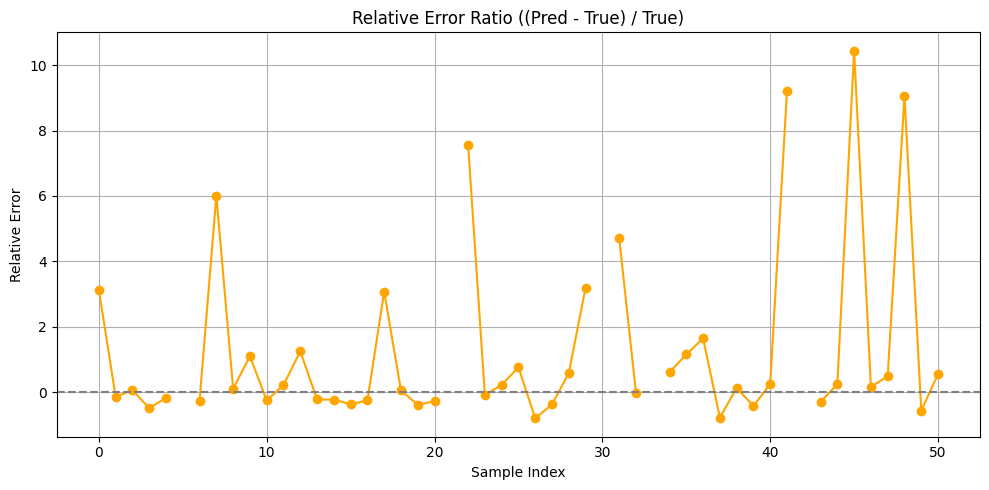

In [283]:
residual_ratio = (final_pred - y_true) / y_true  # (预测值 - 真实值)/真实值

# 替换 0 避免除以 0，或只保留非 0 的样本
safe_y_true = np.where(y_true == 0, np.nan, y_true)
residual_ratio = (final_pred - y_true) / safe_y_true

plt.figure(figsize=(10, 5))
plt.plot(residual_ratio, marker='o', linestyle='-', color='orange')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Relative Error Ratio ((Pred - True) / True)")
plt.xlabel("Sample Index")
plt.ylabel("Relative Error")
plt.grid(True)
plt.tight_layout()
plt.show()

### 可视化-垃圾

/var/folders/xl/v2d6_bws3352wtfw95r6pg6r0000gn/T/ipykernel_93036/138015976.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  at = df.groupby("bin")["amount_total"]
/var/folders/xl/v2d6_bws3352wtfw95r6pg6r0000gn/T/ipykernel_93036/138015976.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  at = df.groupby("bin")["amount_total"]
/var/folders/xl/v2d6_bws3352wtfw95r6pg6r0000gn/T/ipykernel_93036/138015976.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futur

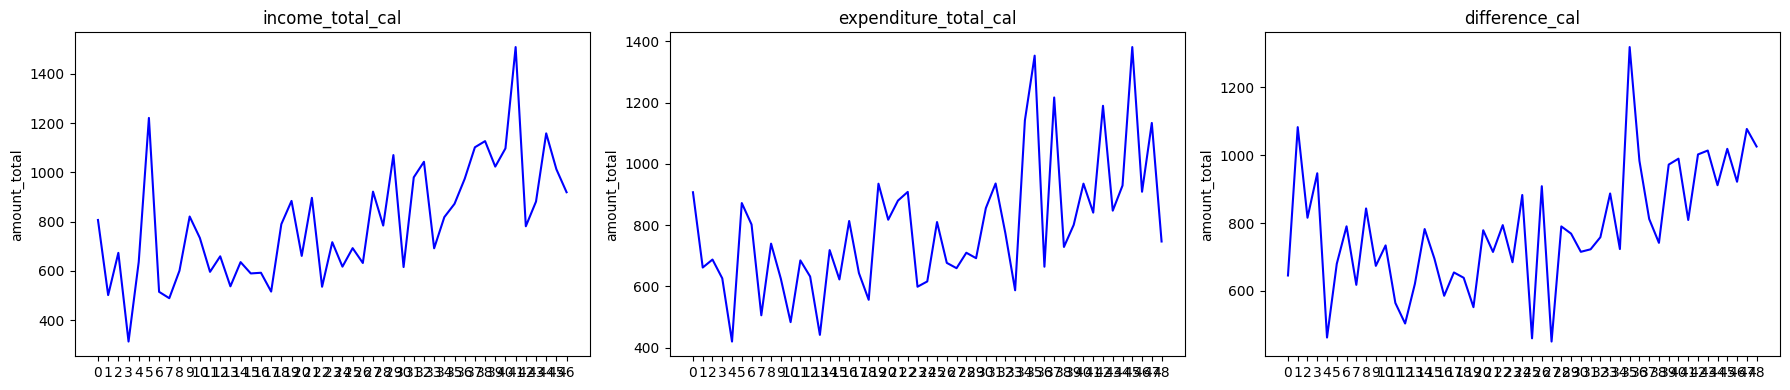

In [21]:
# 和income_total_cal,expenditure_total_cal,difference_cal的关系


# 要分析的3个特征
features = ["income_total_cal", "expenditure_total_cal", "difference_cal"]

fig, axes = plt.subplots(ncols=3, figsize=(18, 4))  # 每个特征一张图

for i, feature in enumerate(features):
    # 将 feature 分箱（等宽或等频）
    df["bin"] = pd.qcut(df[feature], q=50, duplicates='drop')  # 分成10等分箱，可调整
    at = df.groupby("bin")["amount_total"]
    
    # 计算均值和标准差
    atmean = at.mean()
    
    # 画图
    bin_labels = atmean.index.astype(str)
    x = range(len(bin_labels))
    
    axes[i].plot(x, atmean.values, label=f"{feature} vs amount_total", color="blue")
    axes[i].set_xticks(x)
    #axes[i].set_xticklabels(bin_labels, rotation=45, ha="right")
    axes[i].set_title(f"{feature}")
    axes[i].set_ylabel("amount_total")

plt.tight_layout()
plt.show()



In [23]:
# 和income_o,income_s,expenditure_o,expenditure_s的关系
# income 分为objective和subjective两种
df['income_o'] = df['income_assessment_salary'] + df['income_assessment_cpf_payout'] + df['income_assessment_assistance_from_other_agencies'] + df['income_assessment_insurance_payout']
df['income_s'] = df['income_assessment_assistance_from_relatives_friends'] + df['income_assessment_rental_income'] + df['income_assessment_others_income']

# expenditure 分为objective和su7bjective两种
df['expenditure_o'] = df['expenditure_assessment_mortgage_rental'] + df['expenditure_assessmen_utilities'] + df['expenditure_assessment_s_cc_fees'] + df['expenditure_assessment_telecommunications']
df['expenditure_s'] = df['expenditure_assessment_food_expenses'] + df['expenditure_assessment_marketing_groceries'] + df['expenditure_assessment_transportation'] + df['expenditure_assessmen_medical_expenses'] + df['expenditure_assessment_education_expense'] + df['expenditure_assessmen_contribution_to_family_members'] + df['expenditure_assessment_domestic_helper'] + df['expenditure_assessment_loans_debts_installments'] + df['expenditure_assessment_insurance_premiums'] + df['expenditure_assessment_others_expenditure']



/var/folders/xl/v2d6_bws3352wtfw95r6pg6r0000gn/T/ipykernel_93036/3167555594.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  at = df.groupby("bin")["amount_total"]
/var/folders/xl/v2d6_bws3352wtfw95r6pg6r0000gn/T/ipykernel_93036/3167555594.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  at = df.groupby("bin")["amount_total"]
/var/folders/xl/v2d6_bws3352wtfw95r6pg6r0000gn/T/ipykernel_93036/3167555594.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fu

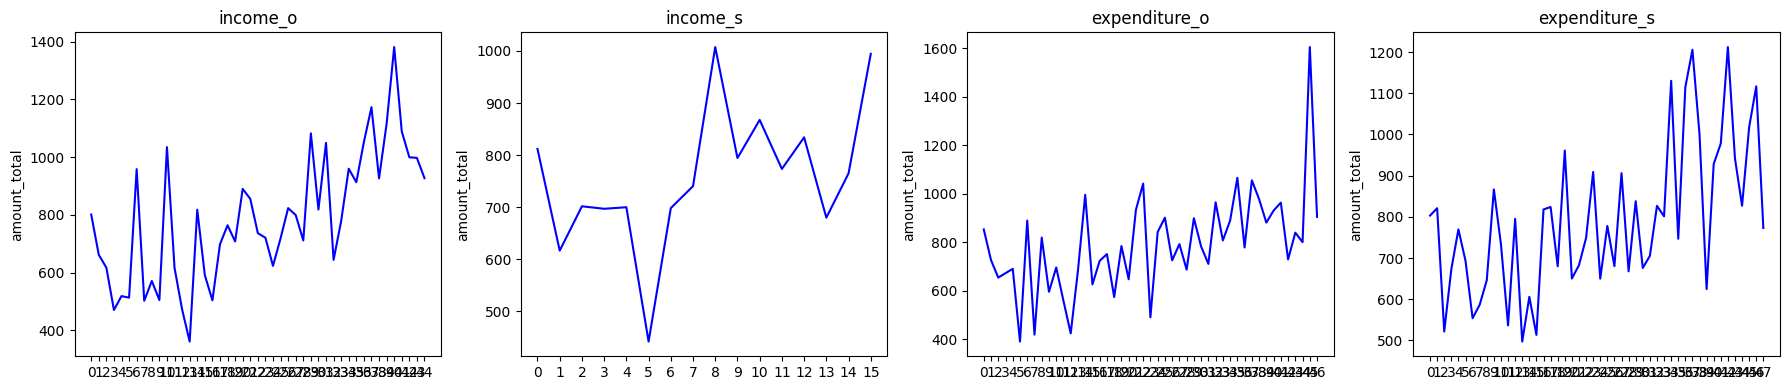

In [25]:
# 和income_o,income_s,expenditure_o,expenditure_s的关系

# 要分析的3个特征
features = ["income_o", "income_s", "expenditure_o", "expenditure_s"]

fig, axes = plt.subplots(ncols=4, figsize=(18, 4))  # 每个特征一张图

for i, feature in enumerate(features):
    # 将 feature 分箱（等宽或等频）
    df["bin"] = pd.qcut(df[feature], q=50, duplicates='drop')  # 分成10等分箱，可调整
    at = df.groupby("bin")["amount_total"]
    
    # 计算均值和标准差
    atmean = at.mean()
    
    # 画图
    bin_labels = atmean.index.astype(str)
    x = range(len(bin_labels))
    
    axes[i].plot(x, atmean.values, label=f"{feature} vs amount_total", color="blue")
    axes[i].set_xticks(x)
    #axes[i].set_xticklabels(bin_labels, rotation=45, ha="right")
    axes[i].set_title(f"{feature}")
    axes[i].set_ylabel("amount_total")

plt.tight_layout()
plt.show()



In [ ]:
# Type of Assistance Applied
# Care Team
# applicant info (gender, age, race, occupation, Identity_ID Type)
# family info (Housing Type, Home Ownership, Monthly Rental, Intake_No. of HH, Intake_PCI, Intake_Status > only keep confirm, 'No. of HH'...)
# financial info (income: salary, CPF, assistance*2, insurance, rantal, others, total) (expenditure: mortgage/rental, utilities, S&CC Fees, food expenses, marketing groceries, telecommunications, transportation, medical expenses (*), education expense (*), contribution to family members, domestic helper, loans/debts/installments, insurance premiums, others, total), current savings
# I&E difference (self-declaration (拟删除), assessment) > 复核
# recommendation, assistance amount, invoice amount

# 分组看影响
# objective / subjective
# financial / others
# care team
# assistance type